# Processamento da informação em línguas naturais

## Análise da críticas do ADOROCINEMA de star wars 9

Henrique Queiroz Reuter

Renato Ponce

In [ ]:
import nltk
import os
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#pip install openpyxl

In [ ]:
#vamos retirar todas as críticas feitas no notebook teste
corpus_critica_path = 'todos/'
corpus_critica = PlaintextCorpusReader(corpus_critica_path,'.*')
print('O corpus tem',len(corpus_critica.fileids()),'textos', 
len(corpus_critica.words()), 'palavras e',len(set(corpus_critica.words())),'types', len(corpus_critica.sents()), 'sentenças')


O corpus tem 110 textos 13015 palavras e 2744 types 418 sentenças


In [ ]:
#Calcularemos a diversiade lexical
def lexical_diversity(texto):
    return len(set(texto)) / len(texto)

print("Diversidade do corpus:", 
    100*lexical_diversity(corpus_critica.words()), '%')
   

Diversidade do corpus: 21.08336534767576 %


## Testes com o cogroo

In [ ]:
from cogroo_interface import Cogroo
cogroo = Cogroo.Instance()

In [ ]:
classes_cogroo=['n', 'prop', 'art', 'pron', 'pron-pers', 'pron-det',
                'pron-indp', 'adj', 'n-adj', 'v', 'v-fin', 'v-inf',
                'v-pcp', 'v-ger', 'num', 'prp', 'adj', 'conj',
                'conj-s','conj-c', 'intj', 'adv', 'xxx']

In [ ]:
def _pos_tags(self):
    pos = {}
    pos.update({"n": "substantivo"})
    pos.update({"prop": "nome próprio"})
    pos.update({"art": "artigo"})
    pos.update({"pron": "pronome"})
    pos.update({"pron-pers": "pronome pessoal"})
    pos.update({"pron-det": "pronome determinativo"})
    pos.update({"pron-indp": "substantivo/pron-indp"})
    pos.update({"adj": "adjetivo"})
    pos.update({"n-adj": "substantivo/adjetivo"})
    pos.update({"v": "verbo"})
    pos.update({"v-fin": "verbo finitivo"})
    pos.update({"v-inf": "verbo infinitivo"})
    pos.update({"v-pcp": "verbo particípio"})
    pos.update({"v-ger": "verbo gerúndio"})
    pos.update({"num": "numeral"})
    pos.update({"prp": "preposição"})
    pos.update({"adj": "adjetivo"})
    pos.update({"conj": "conjunção"})
    pos.update({"conj-s": "conjunção subordinativa"})
    pos.update({"conj-c": "conjunção coordenativa"})
    pos.update({"intj": "interjeição"})
    pos.update({"adv": "advérbio"})
    pos.update({"xxx": "outro"})
    return pos

# pos: "part of speech"
pos = cogroo.pos_tags

## Análise morfológica dos comentários

Análise do cogroo do corpus de críticas, gerando a matriz tagged_j, incluindo apenas palavras e caracteres com classificações válidas:

In [ ]:
#Lista do que queremos remover
Lista = ['<','>','span','spoiler-heading','spoiler-warning','br','"">','spoiler','="""">', 'class', '=""', '-', 'header', ':', '</', 'class', '=""','.<', '><','"','=','=" container onclick =""> =" "> =" content "></']

#Vamos criar uma variável que tenha somente o que queremos
alfabeto = [word for word in corpus_critica.words() if word not in Lista]

#Vamos transformar essa lista em string
Mudado = ' '.join(alfabeto)
print(Mudado)

Um filnal tão frio quanto o filme em si , além de ser sem sabor e tmb forçado para uma saga impactante que acompanhava desde o final dos anos 70 . Naquele tempo sobrava criatividade mas hj em dia , apesar do aumento de efeitos especiais fica a sensação de que não foi entregue um produto que merecia um acabamento a altura . Triste fim ..... o Meste Luke segue sendo apenas uma sombra do que foi . Um filme feito para ser lucrativo e gerar milhões mas não cumpriu o que se esperava . Não gostei . Confuso e distante . Personagens mal aproveitados . Triste fim . Star Wars é a maior saga cinematográfica de todos os tempos , queira você ou não . Desde 1977 , George Lucas já se aventurava em sua epopeia espacial com “ Star Wars – Uma nova esperança ”, e isso trouxe algo novo para a cultura pop daquela época e revolucionou nossos dias não só como um produto audiovisual , mas como todo um estilo de vida , que para alguns chega a ser comparado com uma religião . Star Wars começou do meio com sua jo

In [ ]:
doc = cogroo.analyze(str(Mudado))

sents_j = []

for st_j in doc.sentences:
    sents_j=sents_j+st_j.tokens

tagged_j = []

for tokens in sents_j:
    aux = re.split(r'#',str(tokens))
    aux2 = re.split(r' ',aux[1])
    if(aux2[0] in classes_cogroo):
        tagged_j = tagged_j + [(aux[0],aux2[0],aux2[1])]

print(tagged_j, end='')

[('Um', 'art', 'M=S'), ('filnal', 'n', 'M=S'), ('tão', 'adv', '-'), ('frio', 'adj', 'M=S'), ('quanto', 'adv', '-'), ('o', 'art', 'M=S'), ('filme', 'n', 'M=S'), ('em_si', 'adv', '-'), ('além_de', 'prp', '-'), ('ser', 'v-inf', '-'), ('sem', 'prp', '-'), ('sabor', 'n', 'M=S'), ('e', 'conj-c', '-'), ('tmb', 'n', 'M=S'), ('forçado', 'v-pcp', 'M=S'), ('para', 'prp', '-'), ('uma', 'art', 'F=S'), ('saga', 'n', 'F=S'), ('impactante', 'adj', 'F=S'), ('que', 'pron-indp', 'F=S'), ('acompanhava', 'v-fin', 'IMPF=3S=IND'), ('desde', 'prp', '-'), ('o', 'art', 'M=S'), ('final', 'n', 'M=S'), ('de', 'prp', '-'), ('os', 'art', 'M=P'), ('anos', 'n', 'M=P'), ('70', 'num', 'M=P'), ('em', 'prp', '-'), ('aquele', 'pron-det', 'M=S'), ('tempo', 'n', 'M=S'), ('sobrava', 'v-fin', 'IMPF=3S=IND'), ('criatividade', 'n', 'F=S'), ('mas', 'conj-c', '-'), ('hj', 'v-fin', 'PR=3S=IND'), ('em', 'prp', '-'), ('dia', 'n', 'M=S'), ('apesar_do', 'prp', '-'), ('o', 'art', 'M=S'), ('aumento', 'n', 'M=S'), ('de', 'prp', '-'), ('ef

Vamos gerar uma lista de adjetivos para fazermos um dicionário

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
#Criacao de uma string classificações
adjetivos_j = ''

#Colocar nessa string a classificacao morfologica de cada palavra
# na matriz etiquetada do corpus
i = 0
for x in tagged_j:
    if (pos[ tagged_j[i][1] ] == 'adjetivo'):
        adjetivos_j  += cogroo.lemmatize( tagged_j[i][0] ) + ' '
    i = i + 1

#Tokenizar essa string, sendo identificada cada palavra/classificação
# como elemento da lista tokens
tokens_j = word_tokenize(adjetivos_j)
print(tokens_j,end='')

['frio', 'impactante', 'especial', 'lucrativo', 'confuso', 'distante', 'maior', 'cinematografia', 'espacial', 'nova', '”', 'novo', 'pop', 'audiovisual', 'longo', 'dolorido', 'magnífica', 'primeiros', 'difícil', 'maior', 'verdadeiro', 'narrativo', 'diferente', 'último', 'novo', 'longa', 'melhor', 'simples', 'agridoce', 'confortável', 'nova', 'semelhante', 'básico', 'melhor', 'azul', 'vermelho', 'simples', 'visual', 'esquerdo', 'LINDO', 'dramático', 'emocional', 'lindo', 'segundo', 'irritante', 'legal', 'chato', 'lento', 'lento', 'bom', 'bom', 'velho', 'ótimo', 'melhor', 'nova', 'ótimo', 'sensacional', 'único', 'pior', 'increr', 'ruim', 'cinematografia', 'grande', 'grande', 'nova', 'interessante', 'grande', 'clássico', 'humilde', 'fraco', 'primeiros', 'novo', 'vitorioso', 'distinto', 'diferente', 'novo', 'novo', 'segundo', 'intrigante', 'surpreendente', 'feliz', 'sólido', 'maior', 'brochante', 'terceiro', 'nova', 'diferente', 'ruim', 'ruim', 'melhor', 'pq', 'confuso', 'grandioso', 'funci

In [ ]:
#Temos 311 adjetivos
len(set(tokens_j))

311

In [ ]:
#Lista com os types adjetivos
sorted(set(tokens_j))

['=',
 '>',
 '?',
 'I',
 'LINDO',
 'Melhor',
 'Vingadores',
 'absurdo',
 'adorar',
 'adulto',
 'afrontosa',
 'agridoce',
 'aleatório',
 'alto',
 'always',
 'amar',
 'ambíguo',
 'americano',
 'anterior',
 'antigo',
 'apelativo',
 'artificial',
 'assistível',
 'atual',
 'audiovisual',
 'automático',
 'autêntico',
 'azul',
 'bacana',
 'baixo',
 'beeeem',
 'belo',
 'boa',
 'bom',
 'bonito',
 'branco',
 'breve',
 'brilhante',
 'brochante',
 'básico',
 'canônico',
 'cativante',
 'central',
 'certeiro',
 'certo',
 'chamativos',
 'chata',
 'chato',
 'cheio',
 'chocar',
 'científico',
 'cinematografia',
 'claro',
 'clichês',
 'clássico',
 'comercial',
 'comico',
 'completo',
 'complexo',
 'compreensível',
 'comum',
 'conflitante',
 'confortável',
 'confuso',
 'conservar',
 'considerar',
 'constante',
 'controverso',
 'correto',
 'covarde',
 'criador',
 'criativo',
 'curioso',
 'cômico',
 'decepcionante',
 'decepcionantes',
 'definitivo',
 'derradeiro',
 'desastroso',
 'deslumbrante',
 'diferent

Vamos gerar uma lista de todos os verbos para o dicionário. Com verbos finitivo, infinitivo, gerúndio e particípio.

In [ ]:
#Criacao de uma string classificações
verbosf_j = ''

#Colocar nessa string a classificacao morfologica de cada palavra
# na matriz etiquetada do corpus
i = 0
for x in tagged_j:
    if (pos[ tagged_j[i][1] ] == 'verbo finitivo'):
        verbosf_j  += ( tagged_j[i][0] ) + ' '
    i = i + 1

#Tokenizar essa string, sendo identificada cada palavra/classificação
# como elemento da lista tokens
tokensf_j = word_tokenize(verbosf_j)
print(tokensf_j,end='')

['acompanhava', 'sobrava', 'hj', 'fica', 'foi', 'merecia', 'segue', 'foi', 'cumpriu', 'esperava', 'gostei', 'é', 'queira', 'aventurava', '–', 'trouxe', 'revolucionou', 'começou', 'contou', '”', 'chegamos', 'acompanhamos', 'chegou', 'seja', 'cresceu', 'foi', 'é', '“', '”', 'é', 'varias', 'é', 'é', 'service', 'joga', 'busca', 'amam', 'odeiam', 'traz', 'falava', 'é', 'entregou', 'digamos', 'iniciou', 'entrega', 'aventura', 'é', 'foi', 'jedi', 'é', 'é', 'é', 'levaremos', 'esteja', '=', 'amei', 'redimiram', 'estava', 'ri', 'chorei', 'achei', 'deveria', 'é', 'acho', 'faltou', 'foi', 'filme', 'nota', 'chorei', 'foda', 'é', 'é', 'chorei', 'está', 'é', 'chega', 'fica', 'são', 'é', 'são', 'inicio', 'é', 'vai', 'são', 'ouvi', 'peço', 'achei', 'Teve', 'foi', 'é', 'estragou', 'existe', 'está', 'destruiu', 'destruiu', 'Faltou', 'sei', 'industria', 'prendem', 'foi', 'continuará', 'precisamos', 'É', 'é', 'basta', 'foi', 'publico', 'foi', 'gostaria', 'luta', 'tapa', 'gostaria', 'sacrificam', 'vitoria',

In [ ]:
#Numero de verbos no finitivo 
len(set(tokensf_j))

506

In [ ]:
sorted(set(tokensf_j))

['*',
 '<',
 '=',
 '>',
 'Acaba',
 'Acabei',
 'Acabou',
 'Achei',
 'Apresenta',
 'Assisam',
 'Assista',
 'Assistam',
 'Assistível',
 'CGI',
 'Chorei',
 'Deixou',
 'ESTÃO',
 'Encheu',
 'Estragaram',
 'Está',
 'Estão',
 'Faltou',
 'Ficou',
 'Foi',
 'Fora',
 'Fui',
 'Gostei',
 'Havia',
 'Há',
 'Parece',
 'Perceba',
 'Poderiam',
 'Ray',
 'Resta',
 'Sai',
 'Será',
 'Sinto',
 'São',
 'Tem',
 'Temos',
 'Tenta',
 'Tentaram',
 'Teve',
 'Trazê',
 'Trouxe',
 'VI',
 'Vader',
 'Vale',
 'Vamos',
 'Vou',
 'Vão',
 'acaba',
 'acabaram',
 'acabei',
 'acabou',
 'acerta',
 'acesse',
 'acha',
 'achei',
 'acho',
 'aclamava',
 'acompanha',
 'acompanhamos',
 'acompanhava',
 'acontece',
 'acontecessem',
 'aconteça',
 'acredite',
 'acredito',
 'admito',
 'adorei',
 'agrada',
 'agregou',
 'ajudam',
 'alias',
 'alivio',
 'ama',
 'amam',
 'amarra',
 'amei',
 'and',
 'aparece',
 'aparecem',
 'apareceu',
 'aplaudi',
 'aplicam',
 'apoia',
 'aposta',
 'apresenta',
 'apresentam',
 'aprovem',
 'arrecadaram',
 'arrecadou

In [ ]:
#Criacao de uma string classificações
verbosi_j = ''

#Colocar nessa string a classificacao morfologica de cada palavra
# na matriz etiquetada do corpus
i = 0
for x in tagged_j:
    if (pos[ tagged_j[i][1] ] == 'verbo infinitivo'):
        verbosi_j  += cogroo.lemmatize( tagged_j[i][0] ) + ' '
    i = i + 1

#Tokenizar essa string, sendo identificada cada palavra/classificação
# como elemento da lista tokens
tokensi_j = word_tokenize(verbosi_j)
print(tokensi_j,end='')

['ser', 'ser', 'gerar', 'ser', 'dizer', 'relembrar', 'ver', 'despertar', 'trazer', 'arriscar', 'apresentar', 'fechar', 'passar', 'ter', 'star', 'ver', 'dar', 'ver', 'star', 'sentir', 'sentir', 'reprisar', 'decepcionar', 'reprisar', 'ver', 'ter', 'ver', 'haver', 'ver', 'receber', 'ser', 'star', 'ser', 'ter', 'criar', 'ser', 'pensar', 'fazer', 'ter', 'terminar', 'ver', 'dar', 'ver', 'trazer', 'fazer', 'ser', 'esquecer', 'dar', 'tentar', 'ser', 'fazer', 'vender', 'ampliar', 'star', 'estar', 'fuder', 'salvar', 'dar', 'consertar', 'fazer', 'concertar', 'perceber', 'estar', 'terminar', 'fazer', 'interessar', 'ser', 'gostar', 'divertir', 'negar', 'sentir', 'deixar', 'discutir', 'tocar', 'ser', 'ser', 'ser', 'aprofundar', 'ver', 'ver', 'arrepiar', 'vir', 'introduzir', 'concluir', 'fazer', 'deixar', 'notar', 'explicar', 'tentar', 'recriar', 'dizimar', 'livrar', 'ir', 'eliminar', 'conseguir', 'tomar', 'confrontar', 'soar', 'ter', 'aparecer', 'falar', 'usar', 'falar', 'estar', 'esperar', 'estar',

In [ ]:
len(set(tokensi_j))

144

In [ ]:
sorted(set(tokensi_j))

['abrir',
 'acabar',
 'aceitar',
 'acreditar',
 'agir',
 'agradar',
 'aguardar',
 'amarrar',
 'ampliar',
 'antecipar',
 'aparecer',
 'apresentar',
 'aprofundar',
 'arrebatar',
 'arrecadar',
 'arrepiar',
 'arriscar',
 'arrumar',
 'assistir',
 'balancear',
 'brilhar',
 'buscar',
 'cair',
 'captar',
 'causar',
 'colocar',
 'começar',
 'comprar',
 'concertar',
 'concluir',
 'confrontar',
 'conhecer',
 'conseguir',
 'consertar',
 'construir',
 'contar',
 'continuar',
 'controlar',
 'corrigir',
 'criar',
 'criticar',
 'dar',
 'decepcionar',
 'deixar',
 'demonstrar',
 'demostrar',
 'descobrir',
 'descrever',
 'desejar',
 'despertar',
 'destacar',
 'destruir',
 'discutir',
 'distorcer',
 'divertir',
 'dizer',
 'dizimar',
 'doer',
 'dormir',
 'eliminar',
 'emocionar',
 'encerrar',
 'enfrentar',
 'engolir',
 'entender',
 'entreter',
 'esperar',
 'esquecer',
 'estar',
 'existir',
 'explicar',
 'explorar',
 'falar',
 'fazer',
 'fechar',
 'ficar',
 'fuder',
 'gerar',
 'gostar',
 'hater',
 'haver',


In [ ]:
#Criacao de uma string classificações
verbosg_j = ''

#Colocar nessa string a classificacao morfologica de cada palavra
# na matriz etiquetada do corpus
i = 0
for x in tagged_j:
    if (pos[ tagged_j[i][1] ] == 'verbo gerúndio'):
        verbosg_j  += ( tagged_j[i][0] ) + ' '
    i = i + 1

#Tokenizar essa string, sendo identificada cada palavra/classificação
# como elemento da lista tokens
tokensg_j = word_tokenize(verbosg_j)
print(tokensg_j,end='')

['sendo', 'Olhando', 'respondendo', 'ficando', 'sendo', 'tentando', 'acontecendo', 'fazendo', 'aprendendo', 'sofrendo', 'sangrando', 'lutando', 'alterando', 'desperdiçando', 'sendo', 'indo', 'mostrando', 'pensando', 'lembrando', 'atuando', 'assumindo', 'Resumindo', 'dividindo', 'adorando', 'odiando', 'ficando', 'adorando', 'reverenciando', 'lembrando', 'lembrando', 'assemelhando', 'fazendo', 'adorando', 'crescendo', 'amando', 'aproveitando', 'servindo', 'utilizando', 'mantendo', 'conseguindo', 'finalizando', 'precisando', 'tratando', 'substituindo', 'trazendo', 'fazendo', 'mudando', 'esquivando', 'encontrando', 'fazendo', 'correndo', 'cansando', 'parecendo', 'adicionando', 'vendo', 'copiando', 'Treinando', 'vendo', 'tentando', 'tentando', 'resumindo', 'dando', 'assistindo', 'tirando', 'mostrando', 'passando', 'trazendo', 'deixando', 'colocando', 'usando', 'cortando', 'sendo', 'Falando', 'apresentando', 'dando', 'sendo', 'amarrando', 'fechando', 'Comparando', 'beijando', 'desanimando', 

In [ ]:
len(set(tokensg_j))

85

In [ ]:
sorted(set(tokensg_j))

['Comparando',
 'Explicando',
 'Falando',
 'Olhando',
 'Resumindo',
 'Sendo',
 'Treinando',
 'abordando',
 'acompanhando',
 'acontecendo',
 'adicionando',
 'adorando',
 'alterando',
 'amando',
 'amarrando',
 'anulando',
 'apelando',
 'aprendendo',
 'apresentando',
 'aproveitando',
 'assemelhando',
 'assistindo',
 'assumindo',
 'atuando',
 'beijando',
 'cansando',
 'colocando',
 'começando',
 'comprando',
 'conseguindo',
 'conversando',
 'copiando',
 'correndo',
 'cortando',
 'crescendo',
 'dando',
 'deixando',
 'desanimando',
 'desperdiçando',
 'dividindo',
 'encontrando',
 'esquivando',
 'estragando',
 'falando',
 'fazendo',
 'fechando',
 'ficando',
 'finalizando',
 'indo',
 'interpretando',
 'jogando',
 'lembrando',
 'levando',
 'lutando',
 'manchando',
 'mantendo',
 'mostrando',
 'mudando',
 'odiando',
 'parecendo',
 'passando',
 'pensando',
 'podendo',
 'possuindo',
 'precisando',
 'procurando',
 'programando',
 'respondendo',
 'ressuscitando',
 'resumindo',
 'reverenciando',
 'san

In [ ]:
#Criacao de uma string classificações
verbosp_j = ''

#Colocar nessa string a classificacao morfologica de cada palavra
# na matriz etiquetada do corpus
i = 0
for x in tagged_j:
    if (pos[ tagged_j[i][1] ] == 'verbo particípio'):
        verbosp_j  += ( tagged_j[i][0] ) + ' '
    i = i + 1

#Tokenizar essa string, sendo identificada cada palavra/classificação
# como elemento da lista tokens
tokensp_j = word_tokenize(verbosp_j)
print(tokensp_j,end='')

['forçado', 'entregue', 'feito', 'aproveitados', 'comparado', 'moldado', 'sith', 'sido', 'rottentommatos', 'elaborado', 'feito', 'visto', 'construídos', 'manjado', 'feito', 'contada', 'ressuscitado', 'colocados', 'dado', 'exagerados', 'trabalhada', 'desperdiçada', 'aprendido', 'construídos', 'desconstruídos', 'feito', 'feito', 'desenfreada', 'utilizada', 'feitas', 'juntos', 'visto', 'desperdiçado', 'estruturado', 'derrapada', 'feitas', 'alinhado', 'bagunçado', 'Obrigado', 'feitas', 'trabalhados', 'trabalhada', 'dito', 'divididos', 'feita', 'feito', 'deixados', 'utilizados', 'divertido', 'explorados', 'explicado', 'apresentados', 'vistos', 'explorado', 'explicado', 'tratada', 'apaixonados', 'anunciado', 'proposta', 'forçadas', 'liderada', 'imposta', 'sido', 'citado', 'passados', 'passados', 'aproveitados', 'simplificada', 'relegada', 'simplificadas', 'finalizadas', 'passadas', 'pensada', 'suada', 'mostrado', 'passados', 'pressionado', 'sido', 'mostrado', 'piscadas', 'destruído', 'abalad

In [ ]:
len(set(tokensp_j))

148

In [ ]:
sorted(set(tokensp_j))

['Obrigado',
 'abalados',
 'acompanhado',
 'alinhado',
 'amado',
 'anunciado',
 'apaixonadas',
 'apaixonados',
 'aprendido',
 'apresentados',
 'aproveitados',
 'bagunçado',
 'chamado',
 'chateado',
 'citado',
 'colocado',
 'colocados',
 'começado',
 'comparado',
 'confirmado',
 'conhecidos',
 'consagradas',
 'consagrados',
 'considerado',
 'construída',
 'construído',
 'construídos',
 'contada',
 'contornadas',
 'convertido',
 'corrido',
 'criados',
 'criticado',
 'dado',
 'decepcionado',
 'dedicado',
 'deixados',
 'demorada',
 'derivadas',
 'derivados',
 'derrapada',
 'desconstruídos',
 'desenfreada',
 'desordenada',
 'desperdiçada',
 'desperdiçado',
 'destruída',
 'destruído',
 'desvendadas',
 'diagramadas',
 'dirigido',
 'disfarçada',
 'disparado',
 'disposta',
 'dito',
 'divertido',
 'divididos',
 'elaborado',
 'embalada',
 'emendadas',
 'empenhado',
 'empolgado',
 'entregue',
 'envergonhado',
 'equivocadas',
 'esclarecidas',
 'escolhido',
 'escrita',
 'esperada',
 'esquecido',
 'e

# Substantivos mais comuns

Gráfico com os substantivos mais presentes

In [ ]:
#Criacao de uma string da classe
substantivos_j = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_j:
    if (pos[ tagged_j[i][1] ] == 'substantivo'):
        substantivos_j  += cogroo.lemmatize( tagged_j[i][0] ) + ' '
    i = i + 1

#Tokenizar a string
tokenss_j = word_tokenize(substantivos_j)

#Gerar a distribuição de frequência
fDist_subst_j = FreqDist(word for word in tokenss_j)

fDist_subst_j

FreqDist({'filme': 254, 'personagem': 56, 'saga': 54, 'trilogia': 45, 'final': 34, 'história': 33, 'fã': 31, 'cena': 28, 'roteiro': 27, 'episódio': 27, ...})

In [ ]:
len(set(tokenss_j))

712

In [ ]:
sorted(set(tokenss_j))

['%',
 '/',
 '2015',
 '<',
 '=',
 '>',
 'Ascenção',
 'Braga',
 'C',
 'Conclusão',
 'Cópia',
 'Deus',
 'Elenco',
 'FORÇA',
 'Hux',
 'IX',
 'JEDI',
 'OK',
 'Ordem',
 'Oscar',
 'Prequels',
 'Primeira',
 'SW',
 'Star',
 'Tarcísio',
 'Transformers',
 'Trilogias',
 'Ultimato',
 'Vergonha',
 'Vingadores',
 'Wars',
 'aberração',
 'aberta',
 'abominar',
 'abordagem',
 'acabar',
 'adolescencia',
 'affair',
 'ai',
 'alheio',
 'alicerce',
 'alma',
 'altentico',
 'altura',
 'amador',
 'amadorismo',
 'ambiente',
 'ambivalente',
 'ameaça',
 'amigo',
 'amizade',
 'amo',
 'amor',
 'analfabeto',
 'andar',
 'animal',
 'ano',
 'anônimo',
 'aparição',
 'apelar',
 'apelo',
 'aprendizado',
 'ar',
 'arco',
 'artefato',
 'artifício',
 'ascensão',
 'aspecto',
 'ataca',
 'atmosfera',
 'ator',
 'atração',
 'atrizes',
 'atuação',
 'audiência',
 'aumento',
 'automatico',
 'aventura',
 'avô',
 'ação',
 'baixo',
 'banalizar',
 'bando',
 'barra',
 'barulho',
 'base',
 'batalha',
 'beijo',
 'bem',
 'besteira',
 'bilhet

No handles with labels found to put in legend.


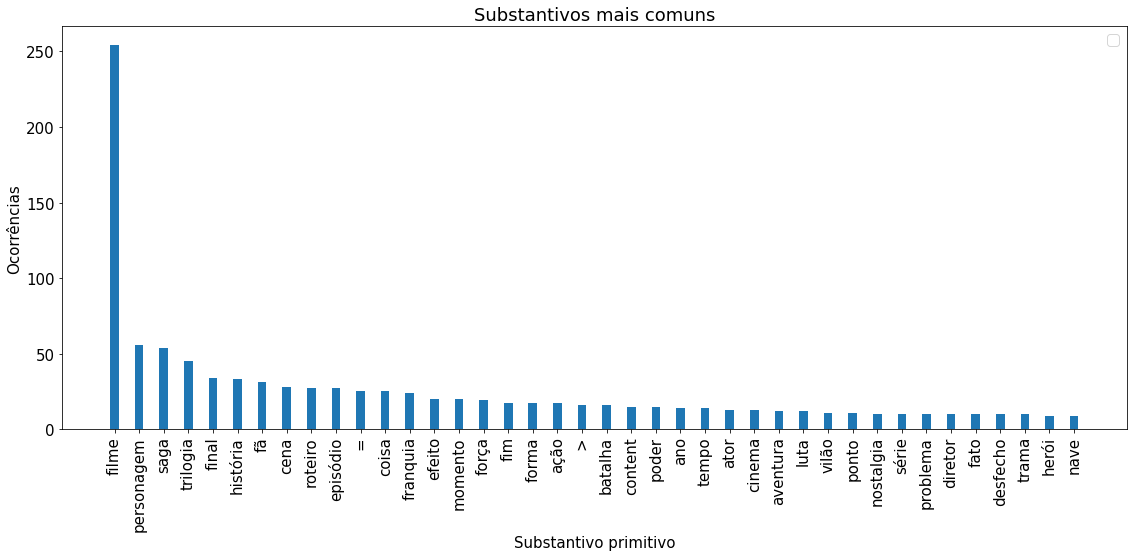

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import nltk

x=fDist_subst_j.most_common(40)
types=[w for (w,f) in x]
freq=[f for (w,f) in x]

plt.rcParams["figure.figsize"] = [16,8]

matplotlib.rcParams.update({'font.size': 15})

x = np.arange(len(types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x,freq, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrências')

ax.set_title('Substantivos mais comuns')
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.set_xlabel('Substantivo primitivo')
ax.legend()
ax.tick_params(axis ='x', rotation = 90)
fig.tight_layout()


plt.show()

In [ ]:
#Ler uma critica individual
print(corpus_critica.sents('3.txt')[0])

['[', 'TEM', 'SPOILER', ']<', 'br', '>', 'Vou', 'resumir', ',', 'o', 'filme', 'é', 'fraco', ',', 'totalmente', 'perdido', ',', 'cenas', 'repetitivas', 'durante', 'mais', 'de', 'duas', 'horas', '.']


# Adjetivos mais comuns

Gráficos com os adjetivos mais frequentes

In [ ]:
#Criacao de uma string da classe
adjetivos_j = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_j:
    if (pos[ tagged_j[i][1] ] == 'adjetivo'):
        adjetivos_j  += cogroo.lemmatize( tagged_j[i][0] ) + ' '
    i = i + 1

#Tokenizar a string
tokens_j = word_tokenize(adjetivos_j)

#Gerar a distribuição de frequência
fDist_adj_j = FreqDist(word for word in tokens_j)

fDist_adj_j

FreqDist({'novo': 31, 'bom': 30, 'nova': 26, 'melhor': 25, 'ótimo': 20, 'fraco': 20, 'último': 19, '–': 18, 'grande': 17, 'pior': 14, ...})

No handles with labels found to put in legend.


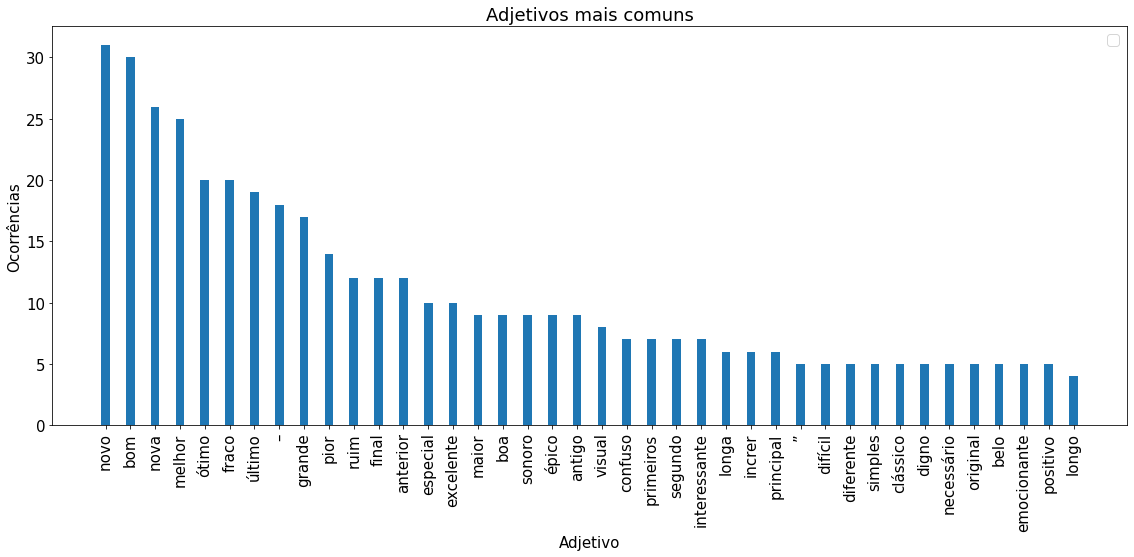

In [ ]:
x=fDist_adj_j.most_common(40)
types=[w for (w,f) in x]
freq=[f for (w,f) in x]

plt.rcParams["figure.figsize"] = [16,8]

matplotlib.rcParams.update({'font.size': 15})

x = np.arange(len(types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x,freq, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrências')

ax.set_title('Adjetivos mais comuns')
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.set_xlabel('Adjetivo')
ax.legend()
ax.tick_params(axis ='x', rotation = 90)
fig.tight_layout()


plt.show()

# Advérbios mais comuns

In [ ]:
#Criacao de uma string da classe
adverbios_j = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_j:
    if (pos[ tagged_j[i][1] ] == 'advérbio'):
        adverbios_j  += cogroo.lemmatize( tagged_j[i][0] ) + ' '
    i = i + 1

#Tokenizar a string
tokensadv_j = word_tokenize(adverbios_j)

#Gerar a distribuição de frequência
fDist_adv_j = FreqDist(word for word in tokensadv_j)

fDist_adv_j

FreqDist({'não': 164, 'como': 67, 'muito': 53, 'mais': 51, 'bem': 51, 'já': 33, 'só': 32, 'assim': 23, 'ainda': 16, 'também': 15, ...})

In [ ]:
len(set(tokensadv_j))

166

In [ ]:
sorted(set(tokensadv_j))

['/',
 '<',
 '>',
 '?',
 'Em',
 'Felizmente',
 'Ordem',
 'Pois',
 'Portanto',
 'Porém',
 'Primeira',
 'a',
 'absoluto',
 'adeus',
 'afinal',
 'agora',
 'ainda',
 'aleatório',
 'algo',
 'ali',
 'aliás',
 'amanhã',
 'antes',
 'apenas',
 'aqui',
 'aquém',
 'assim',
 'atrás',
 'até',
 'aí',
 'bastante',
 'bem',
 'breve',
 'básico',
 'cada',
 'cara',
 'cima',
 'claro',
 'como',
 'completo',
 'de',
 'decepcionante',
 'definitivo',
 'demais',
 'depois',
 'e',
 'efeito',
 'em',
 'enfim',
 'enquanto',
 'entanto',
 'entretanto',
 'então',
 'episodio',
 'episódio',
 'específico',
 'et',
 'etc',
 'exato',
 'exclusivo',
 'exemplo',
 'extremamente',
 'facilmente',
 'final',
 'foda',
 'fora',
 'fundo',
 'futuro',
 'geral',
 'habilmente',
 'hoje',
 'igual',
 'inclusive',
 'infeliz',
 'intencional',
 'ja',
 'junto',
 'juntos',
 'já',
 'lamentável',
 'leve',
 'literal',
 'logo',
 'longe',
 'lá',
 'mais',
 'mal',
 'man',
 'mecânico',
 'meio',
 'melhor',
 'menos',
 'mero',
 'mesmo',
 'morto',
 'muito',
 '

No handles with labels found to put in legend.


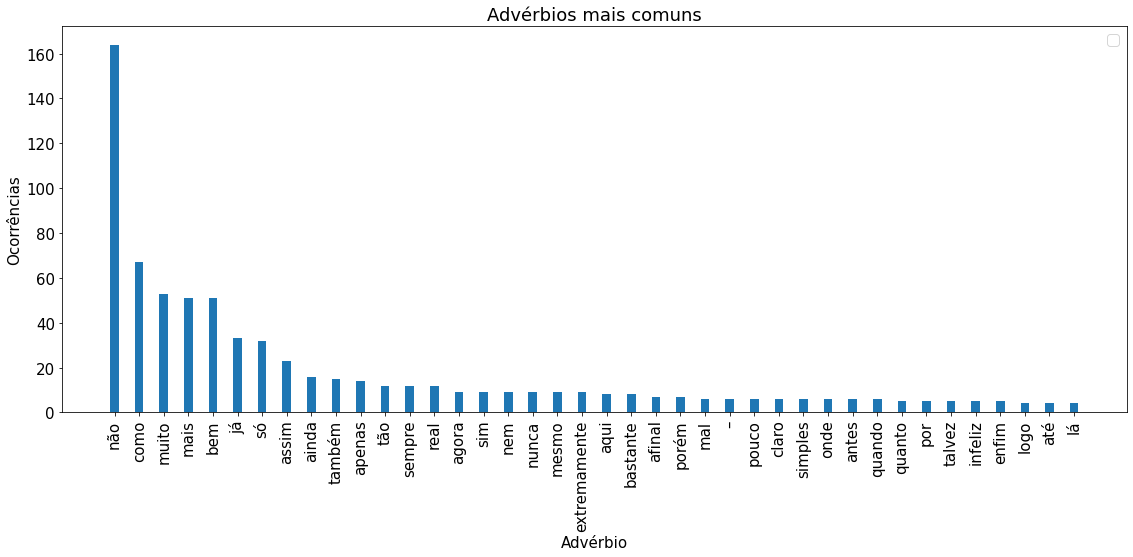

In [ ]:
x=fDist_adv_j.most_common(40)
types=[w for (w,f) in x]
freq=[f for (w,f) in x]

plt.rcParams["figure.figsize"] = [16,8]

matplotlib.rcParams.update({'font.size': 15})

x = np.arange(len(types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x,freq, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrências')

ax.set_title('Advérbios mais comuns')
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.set_xlabel('Advérbio')
ax.legend()
ax.tick_params(axis ='x', rotation = 90)
fig.tight_layout()


plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2bdbb82-530b-4b71-85fb-c683a0c0911d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>